In [1]:
#from scipy import stats
#from scipy import optimize
import scipy
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#sns.set_style('whitegrid')
sns.set(style = 'whitegrid')
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])
print np.mean(x)
print np.median(x)
print x.min(), x.max()
print x.var()
print x.std()

3.1
3.0
0.9 6.7
3.07
1.75214154679


In [3]:
random.seed(123456789)
print random.random()
print random.randint(0, 10)
print '--------------------'
np.random.seed(123456789)
print np.random.randn()
print np.random.rand(5)
print '---------------------'
print np.random.randn(2, 4)
print np.random.randint(10, size = 10)
print np.random.randint(low = 10, high = 20, size = (2, 10))

0.641400616186
5
--------------------
2.2129019979
[ 0.50955304  0.71356403  0.25699895  0.75269361  0.88387918]
---------------------
[[ 2.1283978   0.4531316  -0.91691233  1.33864041]
 [ 0.85866797  0.7272307   0.56782948 -1.09536413]]
[0 5 3 0 0 3 8 3 9 0]
[[16 19 12 17 12 18 18 17 14 12]
 [14 10 16 19 15 13 15 18 11 17]]


# 정규 분포

In [2]:
print np.random.normal(size = (1, 4))
# is the exact same thing as writing
print np.random.randn(1, 4)

[[-0.60947712 -1.37237508  0.69292863  1.13295145]]
[[-0.29139166 -1.83111541 -0.15919444 -0.06401919]]


In [3]:
a = np.random.normal(size = 1000)
bins = np.arange(-4, 5)

# 1000개의 표준정규분포 난수들이 -4 ~ 4(x축) 사이에 들어간다
# bins는 옵션이다. 없어도 됨
relative_freq = np.histogram(a, bins = bins, normed = True)[0]
# histogram은 계층적 array를 만드는데 [0]에는 y축(빈도수), [1]에는 x축(관측값, a 값)
# normed = True를 쓰면, y축의 빈도수가 비율로 표시가 된다(전체 합 = 1일때)
# a의 값들이 x축이지만, bins를 사용하면 값의 범위는 bins를 기준으로 x축에 표시된다

# bins (범위 나누기)
# array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

# relative_freq (원래는 빈도수인데, 정규화된 빈도수)
# array([ 0.004,  0.024,  0.135,  0.346,  0.332,  0.139,  0.02 ,  0.   ])

In [4]:
relative_freq

array([ 0.001,  0.016,  0.144,  0.333,  0.35 ,  0.136,  0.018,  0.002])

(array([ 0.001,  0.016,  0.144,  0.333,  0.35 ,  0.136,  0.018,  0.002]),
 array([-4, -3, -2, -1,  0,  1,  2,  3,  4]),
 <a list of 8 Patch objects>)

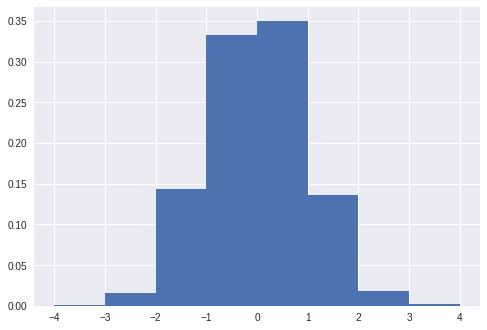

In [5]:
# a = np.random.normal(size = 1000)
# a의 값들은 x축에 들어간다. 하지만 bins를 정의했으므로 bins의 범위가 x축에 표시된다.
plt.hist(a, bins = bins, normed = True)

In [6]:
# 원래의 bins가 범위가 9이므로 하나 줄이기 위한 작업과정
bins = 0.5 * (bins[1:] + bins[:-1])

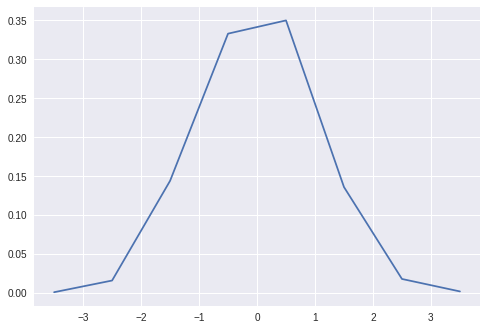

In [7]:
# plot(x축내용, y축내용)
plt.plot(bins, relative_freq)

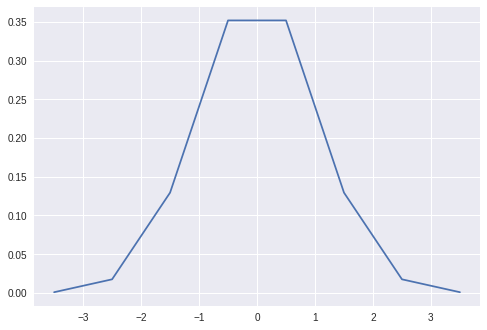

In [8]:
# scipy.stats.norm.pdf(bins) => z = bins일 때 이것이 가리키는 밀도함수 f(x)의 값
# z = 1.96이 가리키는 밀도함수값( f(x)의 값 ) (r에서의 dnorm)
b = scipy.stats.norm.pdf(bins)
plt.plot(bins, b)

# score at percent

In [9]:
# np.random.randn(1000)과 동일
# 평균 0, 분산 1인 정규분포에서의 랜덤값
a = np.random.normal(size = 1000)
print list(a)[:4]
print list(a)[-4:]

[1.3812928393305632, 0.078223992858123773, 1.2011596806114218, -0.56760256393834474]
[-0.33073393098488052, -0.44500556601120111, -1.6830950870758883, -0.0059835940025256872]


In [10]:
pd.DataFrame(a).describe()

,0
count,1000.000000
mean,0.040765
std,1.004415
min,-4.709801
25%,-0.611603
50%,0.027150
75%,0.701683
max,2.875425


In [11]:
scipy.stats.scoreatpercentile(a, 50)

0.027149969157901667

In [12]:
scipy.stats.scoreatpercentile(a, 75)

0.70168287430014797

In [13]:
# 평균, 표편 순으로 출력
scipy.stats.norm.fit(a)

(0.040764537874049267, 1.0039130501269455)

# d

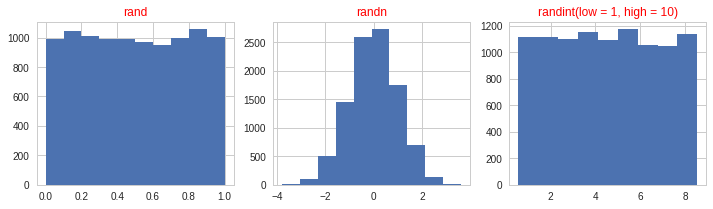

In [53]:
fig, axes = plt.subplots(1, 3, figsize = (12, 3))

axes[0].hist(np.random.rand(10000))
axes[0].set_title('rand', color = 'r')

axes[1].hist(np.random.normal(size = 10000))
#axes[1].hist(np.random.randn(10000))
axes[1].set_title('randn', color = 'r')

axes[2].hist(np.random.randint(1, 10, 10000), bins = 9, align = 'left')
axes[2].set_title('randint(low = 1, high = 10)', color = 'r')

In [72]:
np.random.choice(['a', 'b', 'c', 'a', 'e', 'z'], 3, replace = False)

array(['z', 'a', 'c'], 
      dtype='|S1')

In [85]:
np.random.choice(np.arange(1, 10), 3)

array([5, 2, 7])

In [60]:
np.random.randint(1, 10, 3)

array([4, 4, 5])

In [103]:
np.random.seed(5555)
np.random.randn(4)

array([ 1.64507207,  2.25931161, -2.0511419 ,  1.0507482 ])

In [128]:
# RandomState()는 클래스로 만든다.
rr = np.random.RandomState(5555)

array([ 1.64507207,  2.25931161, -2.0511419 ,  1.0507482 ])

In [117]:
# 다만, (다른 셀에서 사용할 때에만!!!)
# 최초 실행시에만 동일한 값을 출력. 같은 결과를 얻고자 할 때에는 RandomState()를 다시 실행해야함
rr.randn(4)

array([ 1.64507207,  2.25931161, -2.0511419 ,  1.0507482 ])

In [125]:
# choice는 문자형에도 쓸 수 있다.
print np.random.choice(10, 5, replace = False)

prng = np.random.RandomState(123456789)
print prng.rand(2, 4)
print prng.chisquare(1, size = (2, 2))
print prng.standard_t(1, size = (2, 3))
print prng.f(5, 2, size = (2, 4))
print prng.binomial(10, 0.5, size = 10)

[1 5 3 8 9]
[[ 0.53283302  0.5341366   0.50955304  0.71356403]
 [ 0.25699895  0.75269361  0.88387918  0.15489908]]
[[  1.00418922e+00   1.26859720e+00]
 [  2.02731988e+00   2.52605129e-05]]
[[ 0.59734384 -1.27669959  0.09724793]
 [ 0.22451466  0.39697518 -0.19469463]]
[[  0.77372119   0.1213796    1.64779052   1.21399831]
 [  0.45471421  17.64891848   1.48620557   2.55433261]]
[8 3 4 2 4 5 4 4 7 5]


In [137]:
X = scipy.stats.norm(1, 0.5)
print X.mean()
print X.median()
print X.std()
print X.var()

1.0
1.0
0.5
0.25


In [51]:
# 적률생성함수
[X.moment(n) for n in range(5)]

[1.0, 1.0, 1.25, 1.75, 2.6875]

In [151]:
print X.stats()
print X.pdf([0, 1, 2])
print X.cdf([0, 1, 2])
print '-------------------------------------------------------'
print X.rvs(10)
print np.random.normal(1, 0.5, 10)
# np.random.normal(평균, 표준편차, 표본크기)
print '-------------------------------------------------------'
print scipy.stats.norm(1, 0.5).stats()
print scipy.stats.norm.stats(loc = 2, scale = 0.5)

print X.interval(0.95)
print X.interval(0.99)

(array(1.0), array(0.25))
[ 0.10798193  0.79788456  0.10798193]
[ 0.02275013  0.5         0.97724987]
-------------------------------------------------------
[ 0.32075157  1.04606179  0.69916426  1.08119962  1.20976092  0.26098519
  0.42195838  0.6482979   0.99713773  0.5793934 ]
[ 1.43177228  1.54499369  1.05999663  1.38346267  0.80926644  0.8363362
  1.07352944  0.29707689  0.4860905   0.43006394]
-------------------------------------------------------
(array(1.0), array(0.25))
(array(2.0), array(0.25))
(0.020018007729972975, 1.979981992270027)
(-0.28791465177445019, 2.2879146517744502)


# pnorm, qnorm, dnorm

In [143]:
# default값이 평균 = 0, 분산 = 1 임
# z = 1.96까지의 누적확률 (r에서의 pnorm)
scipy.stats.norm.cdf(1.96, loc = 0, scale = 1)

0.97500210485177952

In [60]:
# p = 0.975일 때의 z 값 구하기 (r에서의 qnorm)
scipy.stats.norm.ppf(0.975, loc = 0, scale = 1)

1.959963984540054

In [58]:
# z = 1.96이 가리키는 밀도함수값( f(x)의 값 ) (r에서의 dnorm)
scipy.stats.norm.pdf(1.96, loc = 0, scale = 1)

0.058440944333451476

# 분포함수 그리기

In [171]:
def plot_rv_distribution(A, axes = None):
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize = (12, 3))
    
    # 최소값, 최대값을 담는다
    x_min_999, x_max_999 = A.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)
    
    x_min_95, x_max_95 = A.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)
    
    # 연속형일 때 - pdf / 이산형일 때 - pmf
    if hasattr(A.dist, 'pdf'):
        axes[0].plot(x999, A.pdf(x999), label = 'pdf')
        # fill_between - 그래프 아래 색을 더할 때 => 신뢰수준 95%인 부분만 색칠
        axes[0].fill_between(x95, A.pdf(x95), color = 'r', alpha = 0.25)
    else:
        x999_int = np.unique(x999.astype(int))
        # bar는 인자가 2개 필요하다(x축, y축)
        # pmf, pdf는 z값에 대한 함수의 값을 의미 ( f(x) )
        axes[0].bar(x999_int, A.pmf(x999_int), label = 'pmf')
        
    axes[1].plot(x999, A.cdf(x999), label = 'cdf')
    # sf = 생존함수
    axes[1].plot(x999, A.sf(x999), label = 'sf')
    axes[2].plot(x999, A.ppf(x999), label = 'ppf')
    
    for ax in axes:
        ax.legend()
    return axes

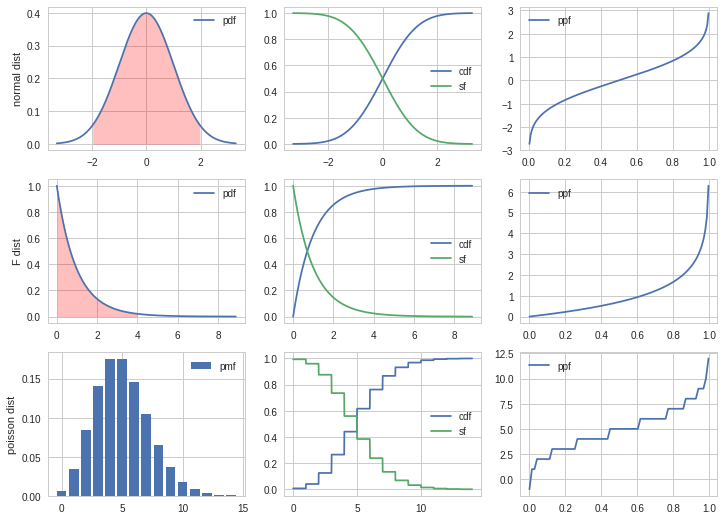

In [172]:
fig, axes = plt.subplots(3, 3, figsize = (12, 9))

X1 = scipy.stats.norm()
plot_rv_distribution(X1, axes = axes[0, :])
axes[0, 0].set_ylabel('normal dist')

X2 = scipy.stats.f(2, 50)
plot_rv_distribution(X2, axes = axes[1, :])
axes[1, 0].set_ylabel('F dist')

X3 = scipy.stats.poisson(5)
plot_rv_distribution(X3, axes = axes[2, :])
axes[2, 0].set_ylabel('poisson dist')

# 카이제곱 분포도 그리기

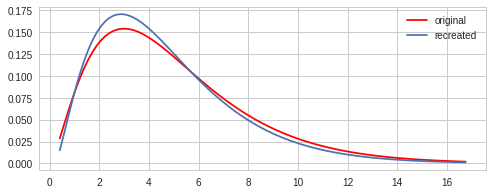

In [111]:
X = scipy.stats.chi2(df = 5)
X_samples = X.rvs(500)

df, loc, scale = scipy.stats.chi2.fit(X_samples)
Y = scipy.stats.chi2(df = df, loc = loc, scale = scale)

fig, ax = plt.subplots(1, 1, figsize = (8, 3))
x_lim = X.interval(.99)
x = np.linspace(*x_lim, num = 100)
ax.plot(x, X.pdf(x), color = 'r', label = 'original')
ax.plot(x, Y.pdf(x), label = 'recreated')
ax.legend()

# 회귀 분석과 피팅 그리고 요약

In [114]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

In [118]:
np.random.seed(123456789)
x1 = np.array([6, 7, 8, 9, 10])
x2 = np.array([11, 12, 13, 14, 15])

X = np.vstack([np.ones(5), x1, x2, x2 * x2]).T
y = np.array([1, 2, 3, 4, 5])

beta, res, rank, sval = np.linalg.lstsq(X, y)

data = {'y':y, 'x1':x1, 'x2':x2}

y, X = patsy.dmatrices('y ~ 1 + x1 + x2 + x1 * x2', data)
np.array(X)

df_data = pd.DataFrame(data)

y, X = patsy.dmatrices('y ~ 1 + x1 + x2 + x1:x2', df_data, return_type = 'dataframe')

model = sm.OLS(y, X)
result = model.fit()

result.params
model = smf.ols('y ~ 1 + x1 + x2 + x1:x2', df_data)

result = model.fit()
result.params
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.561e+28
Date:                Thu, 02 Mar 2017   Prob (F-statistic):           6.41e-29
Time:                        16:26:07   Log-Likelihood:                 153.47
No. Observations:                   5   AIC:                            -300.9
Df Residuals:                       2   BIC:                            -302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5556   4.08e-14  -1.36e+13      0.0

/usr/local/lib/python2.7/dist-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
